# **Medical Readmission**
## WGU D207: Exploratory Data Analysis
### Natalie Toler

---------

## Table of Contents
### A. Describing the Task
#### 1. Question
#### 2. Benefits
#### 3. Relevant Data

### B. Analysis Code
#### 1. Test
#### 2. Output
#### 3. Test explanation

### C. Univariate Distribution
#### 1. First Continuous 
#### 2. Second Continuous
#### 3. First Categorical
#### 4. Second Categorical

### D. Bivariate Distribution
#### 1. First continuous
#### 2. Second Continuous
#### 3. First Categorical
#### 4. Second Categorical

### E. Implications
#### 1. Results of Hypothesis test
#### 2. Limitations of data
#### 3. Course of Action

### F. Panopto Video

### G. Web Sources for code

### H. Sources

In [1]:
#Set up the work space with the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

#Import the dataset and make sure the bonus column is not created.
df = pd.read_csv('medical_clean.csv', index_col=0)
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

### A. Performance Assessment Task

#### 1. Question

> Does the location type of a hospital correlate to more readmission?

Using the medical readmission data that I cleaned in the last task I want to see if the location of a hospital (rural, suburban, or urban) has any bearing on the readmission of patients. 

#### 2. Benefits

Rural areas tend to have less access to home care while urban hospitals often have a larger unhoused population. These are both variables that I would assume would affect the readmission of patients to hospital. Since the question at large is how to create less readmission in the hospital system being able to pinpoint if rural or urban areas have more readmission would allow better targeted studies that have actionable solutions. For example if the test finds that rural areas do have more readmission, a further study could look into the differences between urban and rural hospitals and if lack of home care was found to be a problem then the hospital and other stakeholders could work on expanding homecare in rural areas to help save money on readmission.

#### 3. Relevant Data

The data that will be used in this question will be the columns for Readmission, which is a yes/no binary column with 10000 entries. And the Area column which has three options, Rural, Suburban, and Urban with 10000 entries. 

### B. Statistical Test Code

In [2]:
# Set up the data for the chi-squared test
contingency_table = pd.crosstab(df['ReAdmis'], df['Area'])
print(contingency_table)

Area     Rural  Suburban  Urban
ReAdmis                        
No        2150      2106   2075
Yes       1219      1222   1228


In [3]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared statistic: 0.7133125620168337
P-value: 0.7000130641731285
Degrees of freedom: 2
Expected frequencies: [[2132.9139 2106.9568 2091.1293]
 [1236.0861 1221.0432 1211.8707]]


Since I am using two discrete categorical variables in my analysis the best statistical test to use is the chi-squared test. The chi-squared test is used to test whether the observed values of the variables in the data are consistent with the expected values of the variables assuming all variables are independent. The chi-squared test is the most appropriate choose when dealing with variables that are discrete and categorical. This test will test the null hypothesis -- that the variables are independent -- against the alternate hypothesis -- that the variables are dependent.

In this case the null hypothesis is that the area type of a hospital does not affect readmission rate of patients. The alternative hypothesis is that the area type of a hospital does affect the readmission rate of patients. 

In this test I used the alpha value of 0.05, which is a 95% certainty that a p-value less than 0.05 is statistically significant. 

Since the p-value here is 0.70 we do not have evidence to reject the null hypothesis, therefore I conclude that we accept the null hypothesis that area type and hospital readmission do not have an affect on each other. 

### C. Univariate Variable Distribution

##### Continuous Variables

I am going to look at the distribution of the total charge for patients and the income of patients. 

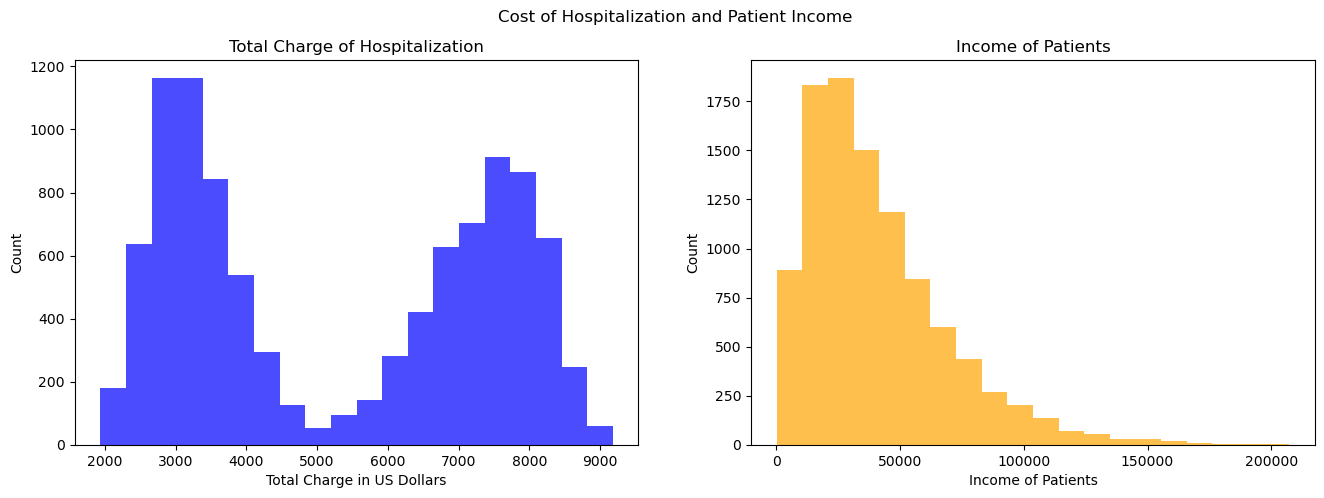

In [4]:
# Set up side by side plots for the two variables
plt.figure(figsize = [16,5])
plt.suptitle('Cost of Hospitalization and Patient Income')

# Plot for total charge of patient
plt.subplot(1, 2, 1)
plt.title('Total Charge of Hospitalization')
plt.hist(data=df, x='TotalCharge', bins = 20, alpha = 0.7, color = 'blue')
plt.xlabel('Total Charge in US Dollars')
plt.ylabel('Count');

# Plot for patient income
plt.subplot(1, 2, 2)
plt.title('Income of Patients')
plt.hist(data=df, x='Income', bins = 20, alpha = 0.7, color = 'orange')
plt.xlabel('Income of Patients')
plt.ylabel('Count');

As we can see the distribution for the "total charge" variable is bimodal with two distinct peaks, one at around 3000 dollars and the other around 7500 dollars. This is an interesting trend and would be interesting to look at in relation to other variables, such as what the initial admission was for and what services were used. It is important to note that in the data the "total charge" data is the amount charged to a patient daily and represents the averages per patient billed to patients. However this actually doesn't represent the total charge to a patient because there are additional charges in the additional_charge variable which represents the average amount charged to patients for additional services. 

Income is a right skewed distribution which is to be expected as the majority of people have lower to mid incomes. The peak of this distribution is under 50000 dollars. I would be interested in looking at the distibution when broken down by the area type of the hospital. 

##### Categorical Values

I am going to be looking at gender and number of children. 

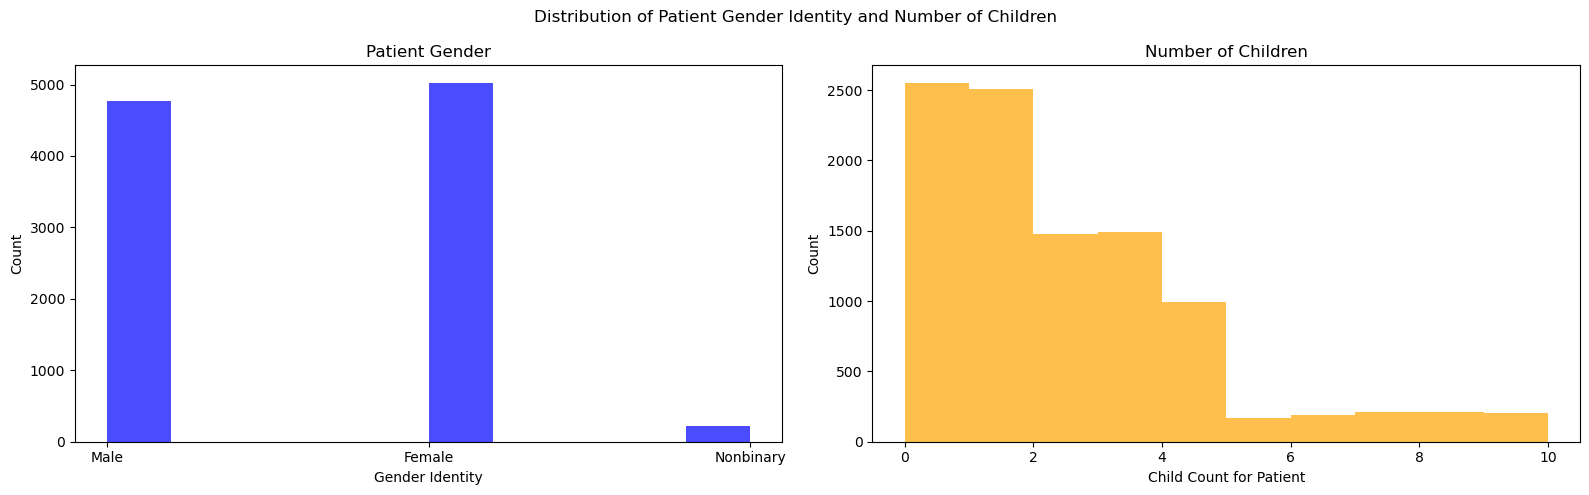

In [5]:
plt.figure(figsize=[16, 5])
plt.suptitle('Distribution of Patient Gender Identity and Number of Children')

# Plot for patient gender
plt.subplot(1, 2, 1)
plt.title('Patient Gender')
plt.hist(data=df, x='Gender', alpha=0.7, color='blue')
plt.xlabel('Gender Identity')
plt.ylabel('Count')

# Plot for number of children
plt.subplot(1, 2, 2)
plt.title('Number of Children')
plt.hist(data=df, x='Children', alpha=0.7, color='orange')
plt.xlabel('Child Count for Patient')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Gender identity has a uniform distibution with non-binary in this case working as an outlier. This is to be expected and in any study where gender identity isn't the main point it is good to see a fairly uniform distribution. 

For number of children the distribution is right skewed which is to be expected, however, instead of peaks the data has plateaus or stair steps. 0-2 children is uniform, 2-4 children is uniform, and 5-10 children is fairly uniform. This isn't particulartly surprising and it would be interesting to see how these numbers coorespond with age and gender.

### D. Bivariate Variable Distribution

##### Continuous Data

I will be looking at the continuous data of Total Charge again but this time I want to look at total charge in relationship to the reason for initial admission of the patient. 

I will also be looking at income in relationship with the area type of the hospital. 

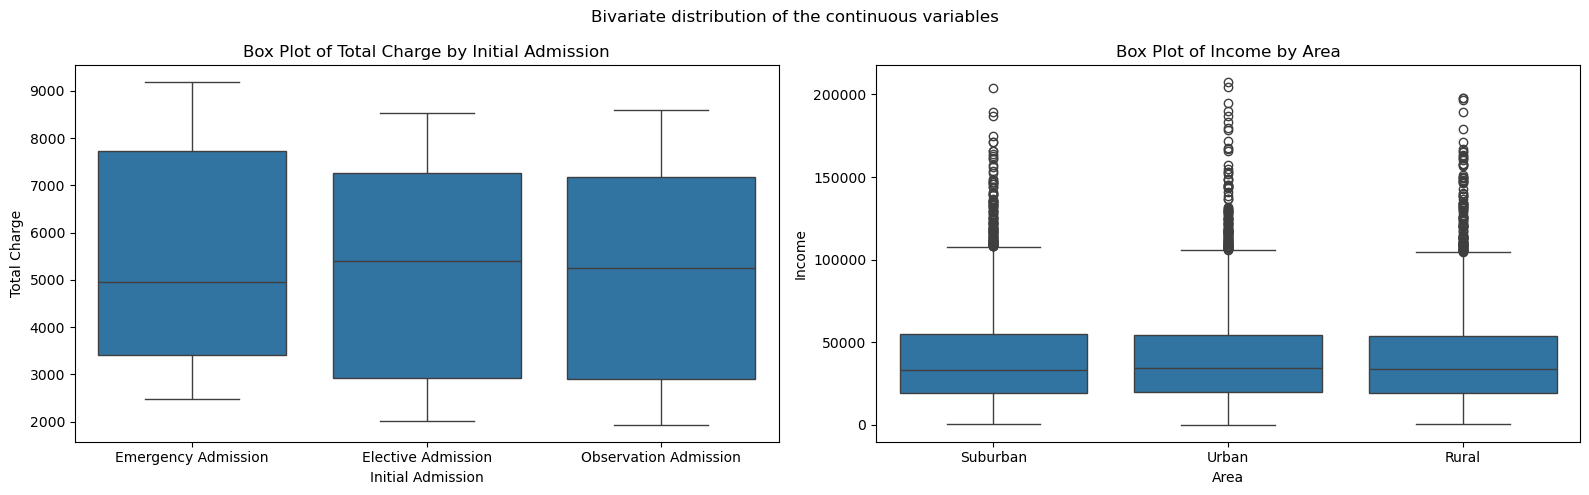

In [6]:
plt.figure(figsize=[16, 5])
plt.suptitle('Bivariate distribution of the continuous variables')

plt.subplot(1, 2, 1)
sns.boxplot(x="Initial_admin", y="TotalCharge", data=df)
plt.title("Box Plot of Total Charge by Initial Admission")
plt.xlabel("Initial Admission")
plt.ylabel("Total Charge")

plt.subplot(1, 2, 2)
sns.boxplot(x="Area", y="Income", data=df)
plt.title("Box Plot of Income by Area")
plt.xlabel("Area")
plt.ylabel("Income")

plt.tight_layout()
plt.show()

The data for both of these variables is fairly evenly distributed. The biggest difference I see is that Emergency Admission leads to a lower median value for total charge but also skews higher for costs than the other two admission reasons which are evenly distrubuted. For Area and income the distributions are nearly identical. 

##### Categorical Variables

I will once again be looking at the categorical variables of gender and number of children. This time I will look at the relationship between Gender and initial admission reason and the relationship betwen number of children and gender. 

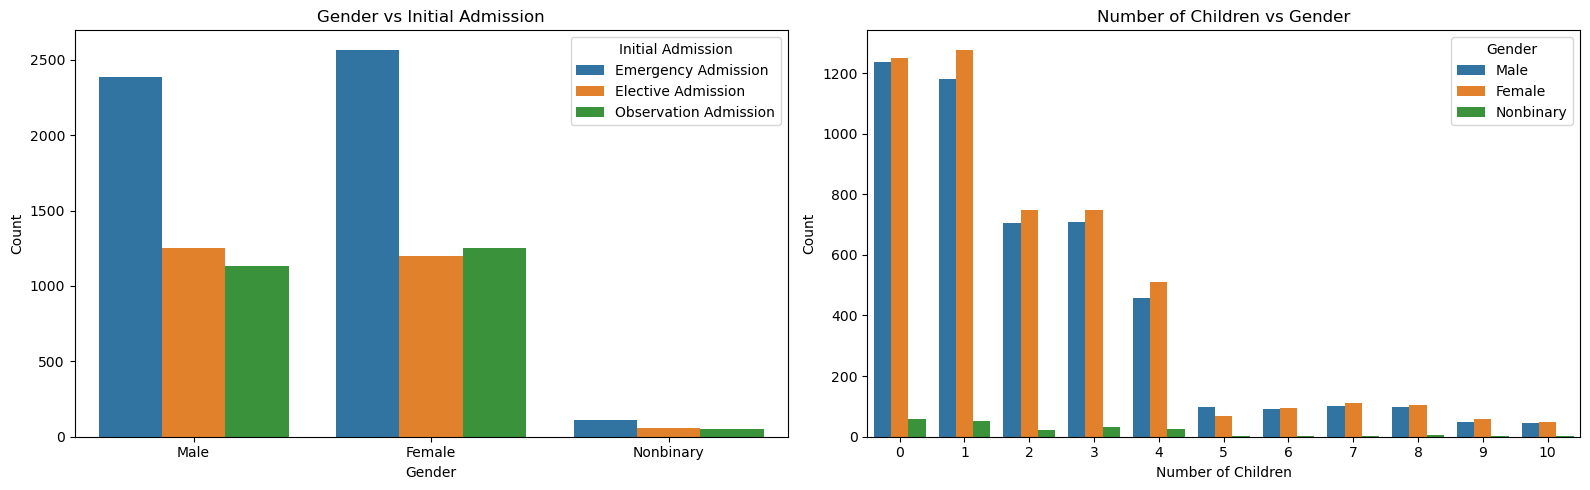

In [7]:
plt.figure(figsize=[16, 5])

# First chart: Gender vs Initial Admission
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Gender", hue="Initial_admin")
plt.title("Gender vs Initial Admission")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Initial Admission")

# Second chart: Number of Children vs Age
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Children", hue="Gender")
plt.title("Number of Children vs Gender")
plt.xlabel("Number of Children")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Once again gender doesn't have a huge difference between the gender identities. It is interesting to see that male identifying patients have a slightly higher elective admission while female identitfying patients have a flightly higher observation admission. Nothing significant but an interesting trend. 

For Gender and number of children besides having 5 children female patients are higher than male patients in all other numbers. It is very interesting to see that the difference between female and male lessons as the numbers of children goes higher. 

### E. Implications

#### 1. Results of the hypothesis test
The hypothesis test between hospital area type and readmission count resulted in a p-value of 0.70. Since the threshold was set to 0.05, which means a 95% certainty that the variables are dependent, we can safely say that the null hypothesis has failed to be rejected. 0.70 is greater than 0.05 and suggests that the two variables being tested are independent of each other. 

#### 2. Limitations of the data
The sample size in this study isn't particularly robust. When broken out into the two variables that I am looking at the three categories of area type become quite small. For patients who were readmited into the hospital the numbers for rural, suburban, and urban are under 1300, while patients not readmitted for each area type is below 2200. Having a larger sample size would be better for any analysis of this data, especially when starting to break the data down into smaller sections. 

#### 3. Course of Action
Since the null hypothesis failed to be rejected there is no further action to be down with area type and readmission. As an analyst I would recommend further hypothesis testing on the variables to see if these studied variables have correlation with readmission rates. 

### F. Panopto Video
> https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5df8e015-7075-4ea4-be51-b06e00faf5ee

### G. Web Sources
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html was used to ensure proper coding of the chi-squared test

### H. Sources
> The datacamp coursework for D206 was used to understand and learn the hypothesis testing needed for this project. 